In [1]:
# This notebook loads in one month of Lauren's clustering results
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import xarray as xr
import datetime
import warnings
#from pyhdf import SD
from pyhdf.SD import SD, SDC
warnings.simplefilter("ignore")

In [2]:
#constants
a = 6.37E6 #m

In [5]:
#open the local copy
f = xr.open_dataset('2001_07Clustered_Data_Globe150.nc4')
print(f)
altitude_lh = np.array(f.altitude_lh.copy())
surf_rain = np.array(f.surf_rain.copy())
latent_heating = np.array(f.latent_heating.copy())
latitude = np.array(f.latitude.copy())
longitude = np.array(f.longitude.copy())
time = np.array(f.time.copy())
rain_type = np.array(f.rain_type.copy())
labels = np.array(f.Labels.copy())

<xarray.Dataset>
Dimensions:          (altitude_lh: 19, clusteredCoords: 4925259)
Coordinates:
  * clusteredCoords  (clusteredCoords) int64 0 1 2 3 ... 4925256 4925257 4925258
  * altitude_lh      (altitude_lh) float32 0.0 0.5 1.0 2.0 ... 15.0 16.0 17.0
Data variables:
    surf_rain        (clusteredCoords) float64 ...
    latent_heating   (clusteredCoords, altitude_lh) float64 ...
    latitude         (clusteredCoords) float64 ...
    longitude        (clusteredCoords) float64 ...
    time             (clusteredCoords) datetime64[ns] ...
    rain_type        (clusteredCoords) float64 ...
    Labels           (clusteredCoords) int64 ...


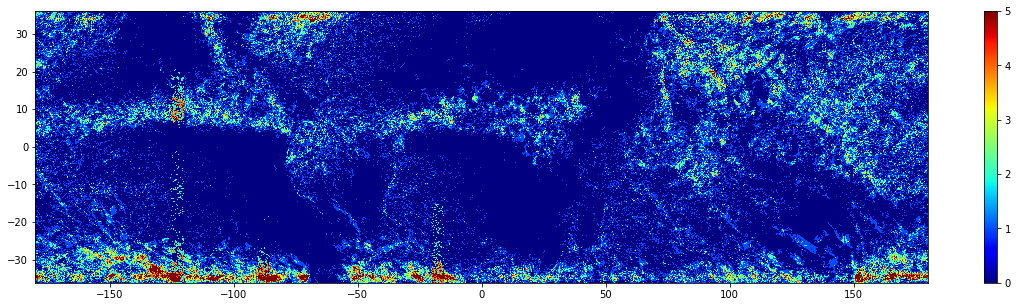

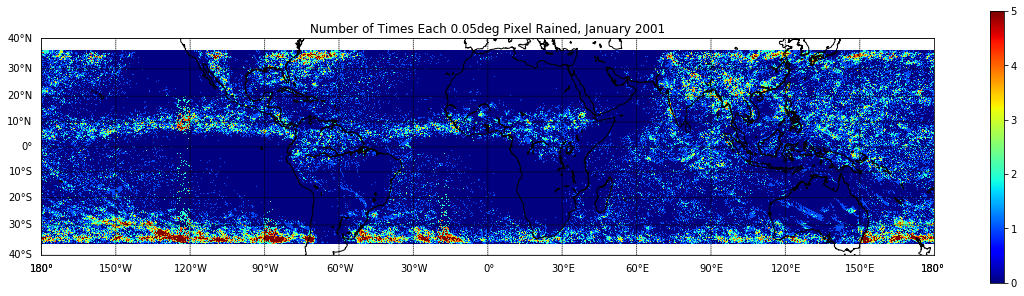

In [6]:
# Plot number of rain events at each grid point
temp_lat = np.round(20*latitude)/20
temp_lon = np.round(20*longitude)/20
bins_lon = np.arange(1+20*360)/20 - 180.025
bins_lat = np.arange(1+20*72.3)/20 - 36.175

fig = plt.figure(num=None, figsize=(20, 5) )
n=plt.hist2d(temp_lon, temp_lat, bins=[bins_lon,bins_lat], cmap='jet')
plt.clim(0, 5)
plt.colorbar();

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x = 0.5*(bins_lon[1:]+bins_lon[:-1])
y = 0.5*(bins_lat[1:]+bins_lat[:-1])
x, y = m(*np.meshgrid(x,y))
temp = np.transpose(np.array(n[0]))
m.pcolor(x, y, temp, cmap='jet')
plt.clim(0, 5)
plt.colorbar()
plt.title('Number of Times Each 0.05deg Pixel Rained, January 2001');
#fig.savefig('plots/nevents_0101.jpg', format='jpg', bbox_inches='tight');

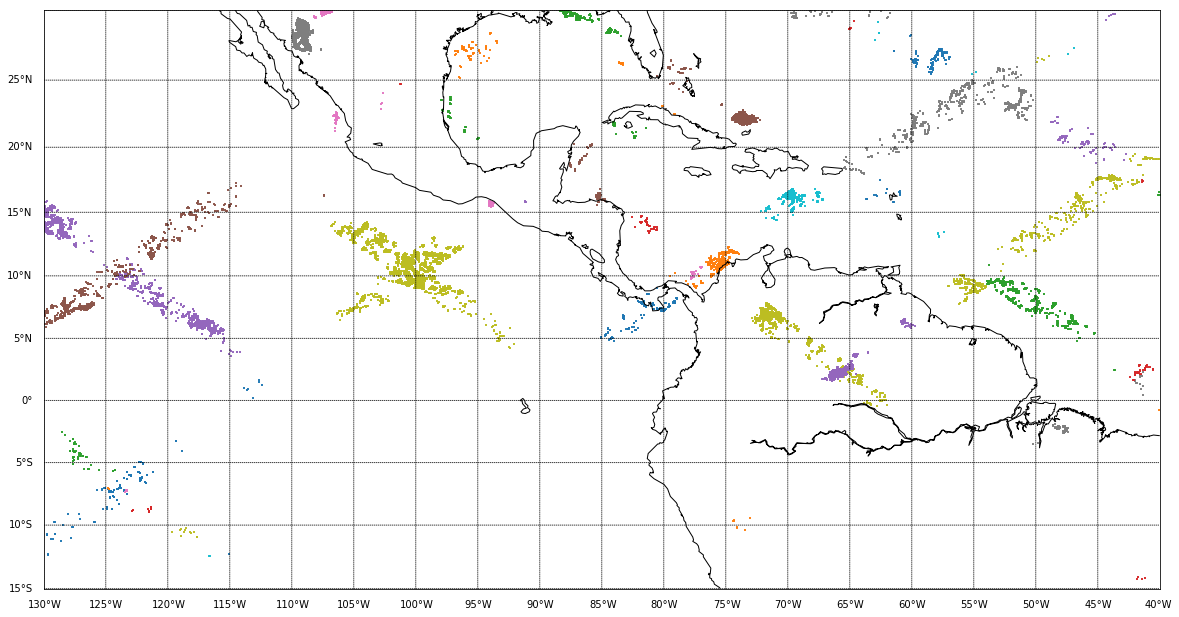

In [7]:
# plot events for a particular time span
plot_date = np.datetime64('2001-07-31T12:00:00.000000000')
max_dt_hours = 12

delta_time = np.array(time - plot_date, dtype='float64')/(60*60*1E9)
condition = np.abs(delta_time) <= max_dt_hours
lon_temp = np.extract(condition, longitude)
lat_temp = np.extract(condition, latitude)
labels_temp = np.extract(condition, labels)
unique_labels = np.unique(labels_temp)
time_temp = np.extract(condition, time)
nevents = np.size(unique_labels)

#fig = plt.figure(num=None, figsize=(17, 7) )
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#m.drawcoastlines()
#m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
#for i in np.arange(nevents):
#    event = unique_labels[i]
#    condition = labels_temp-event == 0
#    event_lat = np.extract(condition, lat_temp)
#    event_lon = np.extract(condition, lon_temp)
#    x, y = m(event_lon, event_lat)
#    m.scatter(x, y)
##plt.title('One Day, Pixels Colored by Event');
##fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

latmin = -15
latmax = 30
lonmin = -130
lonmax = -40
res = 5
labels_temp = labels_temp[lat_temp<=latmax]
lon_temp = lon_temp[lat_temp<=latmax]
lat_temp = lat_temp[lat_temp<=latmax]
labels_temp = labels_temp[lat_temp>=latmin]
lon_temp = lon_temp[lat_temp>=latmin]
lat_temp = lat_temp[lat_temp>=latmin]
labels_temp = labels_temp[lon_temp<=lonmax]
lat_temp = lat_temp[lon_temp<=lonmax]
lon_temp = lon_temp[lon_temp<=lonmax]
labels_temp = labels_temp[lon_temp>=lonmin]
lat_temp = lat_temp[lon_temp>=lonmin]
lon_temp = lon_temp[lon_temp>=lonmin]
unique_labels = np.unique(labels_temp)
nevents = np.size(unique_labels)

fig = plt.figure(num=None, figsize=(20, 20) )
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,res),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,res),labels=[0,0,0,1])
for i in np.arange(nevents):
    event = unique_labels[i]
    condition = labels_temp-event == 0
    event_lat = np.extract(condition, lat_temp)
    event_lon = np.extract(condition, lon_temp)
    x, y = m(event_lon, event_lat)
    m.scatter(x, y, s=1, marker='s')
#plt.title('One Day, Pixels Colored by Event');
#fig.savefig('plots/pixels4_0701_6km.eps', format='eps', bbox_inches='tight');

Text(0.5, 1.0, 'July 30, 2001, 01:50, 6km')

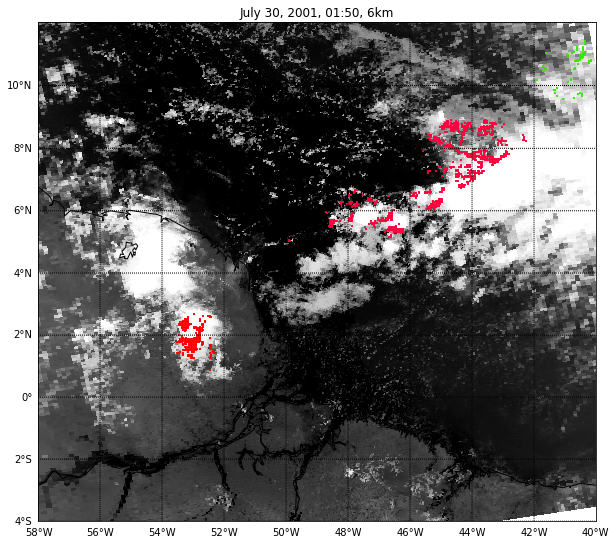

In [8]:
# Compare to MODIS image
FILE_NAME = 'modis_images/MOD021KM.A2001211.0150.061.2017174203127_y2001m07d30t0150.hdf'
hdf = SD(FILE_NAME, SDC.READ)
#hdf.datasets()

lat = hdf.select('Latitude')
lon = hdf.select('Longitude')
val = hdf.select('EV_1KM_Emissive')
lat = lat[:,:]
lon = lon[:,:]
#value = val[:,:]
value = val[:,:,:]
#nlat = np.size(lat,0)
#nlon = np.size(lon,0)

latmin = -4
latmax = 12
lonmin = -58
lonmax = -40
res = 2

fig = plt.figure(num=None, figsize=(10, 10) )
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            resolution='l',projection='merc')
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#res = 15
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,res),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,res),labels=[0,0,0,1])

data = value[0,::5,5::5]
x, y = m(lon, lat)
m.pcolor(x,y,data,cmap = plt.get_cmap('Greys'))
plt.clim(3000, 10000)
#plt.colorbar()

plot_date = np.datetime64('2001-07-30T01:50:00.000000000')
max_dt_hours = 2

delta_time = np.array(time - plot_date, dtype='float64')/(60*60*1E9)
condition = np.abs(delta_time) <= max_dt_hours
lon_temp = np.extract(condition, longitude)
lat_temp = np.extract(condition, latitude)
labels_temp = np.extract(condition, labels)
unique_labels = np.unique(labels_temp)
time_temp = np.extract(condition, time)
nevents = np.size(unique_labels)

labels_temp = labels_temp[lat_temp<=latmax]
lon_temp = lon_temp[lat_temp<=latmax]
lat_temp = lat_temp[lat_temp<=latmax]
labels_temp = labels_temp[lat_temp>=latmin]
lon_temp = lon_temp[lat_temp>=latmin]
lat_temp = lat_temp[lat_temp>=latmin]
labels_temp = labels_temp[lon_temp<=lonmax]
lat_temp = lat_temp[lon_temp<=lonmax]
lon_temp = lon_temp[lon_temp<=lonmax]
labels_temp = labels_temp[lon_temp>=lonmin]
lat_temp = lat_temp[lon_temp>=lonmin]
lon_temp = lon_temp[lon_temp>=lonmin]
unique_labels = np.unique(labels_temp)
nevents = np.size(unique_labels)

cmap = plt.get_cmap('prism')
for i in np.arange(nevents):
    event = unique_labels[i]
    condition = labels_temp-event == 0
    event_lat = np.extract(condition, lat_temp)
    event_lon = np.extract(condition, lon_temp)
    x, y = m(event_lon, event_lat)
    m.scatter(x, y, s=1, marker='s', color=cmap(i/nevents))
plt.title('July 30, 2001, 01:50, 6km')
#fig.savefig('plots/modis_073001_0150_6km.jpg', format='jpg', bbox_inches='tight');

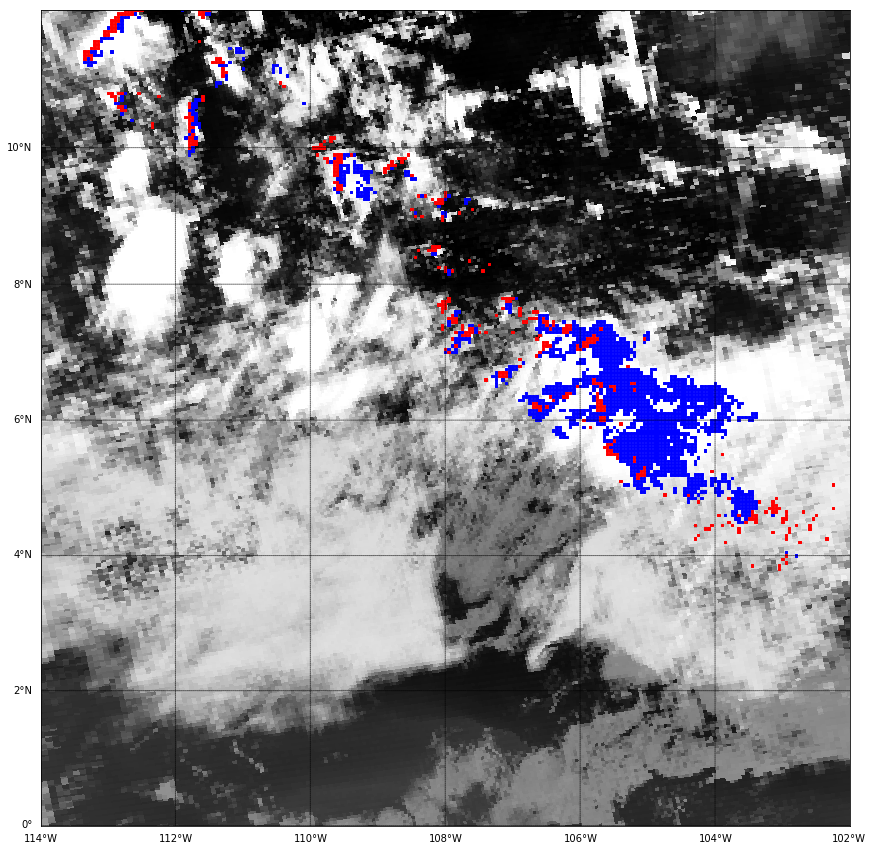

In [9]:
# Compare to MODIS image
FILE_NAME = 'modis_images/MOD021KM.A2001189.0545.061.2017174175911_y2001m07d08t0545.hdf'
hdf = SD(FILE_NAME, SDC.READ)
#hdf.datasets()

lat = hdf.select('Latitude')
lon = hdf.select('Longitude')
val = hdf.select('EV_1KM_Emissive')
lat = lat[:,:]
lon = lon[:,:]
#value = val[:,:]
value = val[:,:,:]
#nlat = np.size(lat,0)
#nlon = np.size(lon,0)

latmin = 0
latmax = 12
lonmin = -114
lonmax = -102
res = 2

fig = plt.figure(num=None, figsize=(15, 15) )
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            resolution='l',projection='merc')
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#res = 15
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,res),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,res),labels=[0,0,0,1])

data = value[0,::5,5::5]
x, y = m(lon, lat)
m.pcolor(x,y,data,cmap = plt.get_cmap('Greys'))
plt.clim(3000, 10000)
#plt.colorbar()

plot_date = np.datetime64('2001-07-08T05:45:00.000000000')
max_dt_hours = 1

delta_time = np.array(time - plot_date, dtype='float64')/(60*60*1E9)
condition = np.abs(delta_time) <= max_dt_hours
lon_temp = np.extract(condition, longitude)
lat_temp = np.extract(condition, latitude)
labels_temp = np.extract(condition, labels)
type_temp = np.extract(condition, rain_type)
unique_labels = np.unique(labels_temp)
time_temp = np.extract(condition, time)
nevents = np.size(unique_labels)

labels_temp = labels_temp[lat_temp<=latmax]
type_temp = type_temp[lat_temp<=latmax]
lon_temp = lon_temp[lat_temp<=latmax]
lat_temp = lat_temp[lat_temp<=latmax]
labels_temp = labels_temp[lat_temp>=latmin]
type_temp = type_temp[lat_temp>=latmin]
lon_temp = lon_temp[lat_temp>=latmin]
lat_temp = lat_temp[lat_temp>=latmin]
labels_temp = labels_temp[lon_temp<=lonmax]
type_temp = type_temp[lon_temp<=lonmax]
lat_temp = lat_temp[lon_temp<=lonmax]
lon_temp = lon_temp[lon_temp<=lonmax]
labels_temp = labels_temp[lon_temp>=lonmin]
type_temp = type_temp[lon_temp>=lonmin]
lat_temp = lat_temp[lon_temp>=lonmin]
lon_temp = lon_temp[lon_temp>=lonmin]
unique_labels = np.unique(labels_temp)
nevents = np.size(unique_labels)

for i in np.arange(nevents):
    event = unique_labels[i]
    condition = labels_temp-event == 0
    event_lat = np.extract(condition, lat_temp)
    event_lon = np.extract(condition, lon_temp)
    event_type = np.extract(condition, type_temp)
    x, y = m(event_lon, event_lat)
    m.scatter(x, y, c=event_type, s=6, marker='s', cmap='bwr')
    plt.clim(1, 2)
#plt.colorbar(); # 1(blue) = stratiform; 2(red) = convective for bwr colormap

In [10]:
#compile event mean information: pixel times, latitudes, longitudes, rain rates, rain types, latent heating profiles
unique_labels = np.unique(labels)
nevents = np.size(unique_labels)
npixels = np.size(latitude)
pixels = np.arange(npixels)

event_time = np.nan*np.zeros(shape=(nevents), dtype=float)
event_area = np.nan*np.zeros(shape=(nevents), dtype=float)
event_lat_mean = np.nan*np.zeros(shape=(nevents), dtype=float)
event_lon_mean = np.nan*np.zeros(shape=(nevents), dtype=float)
event_pr_mean = np.nan*np.zeros(shape=(nevents), dtype=float)
event_frac_conv = np.nan*np.zeros(shape=(nevents), dtype=float)
event_frac_strat = np.nan*np.zeros(shape=(nevents), dtype=float)
event_frac_other = np.nan*np.zeros(shape=(nevents), dtype=float)
event_lhp_mean = np.nan*np.zeros(shape=(nevents,19), dtype=float)
event_lhpmax_alt = np.nan*np.zeros(shape=(nevents), dtype=float)
dy = a*np.pi*0.05/(180*1000) #km
for i in np.arange(nevents):
    # Select pixels for each event
    print(i/nevents)
    ind = pixels[labels == i]
    temp_time = time[ind]
    temp_lat = latitude[ind]
    temp_lon = longitude[ind]
    temp_pr = surf_rain[ind]
    temp_type = rain_type[ind]
    temp_lhp = latent_heating[ind,:]
    
    # Event area, mean location and precip rate
    temp = np.cos(np.pi*temp_lat/180)
    dx = a*np.pi*0.05*np.cos(np.pi*temp_lat/180)/(180*1000) #km
    event_time[i] = temp_time[0]
    event_area[i] = np.nansum(dx*dy)
    event_lat_mean[i] = np.nansum(temp_lat*temp)/np.nansum(temp)
    event_lon_mean[i] = np.nansum(temp_lon*temp)/np.nansum(temp)
    event_pr_mean[i] = np.nansum(temp_pr*temp)/np.nansum(temp)
    
    # Event mean height where latent heating peaks
    npixels2 = np.size(ind)
    # Create a dummy matrix of small values to make sure there aren't any
    # identical values
    sign = np.empty((npixels2))
    sign[::2] = 1
    sign[1::2] = -1
    sign = np.tile(sign, (19,1)).swapaxes(0,1)
    dummy_vals = 1E-10*np.arange(19)
    dummy_vals = np.tile(dummy_vals, (npixels2,1))*sign
    temp_lhp2 = temp_lhp + dummy_vals
    # Find each pixel's height of peak latent heating
    temp_alt = np.tile(altitude_lh, (npixels2,1))
    lhmax = np.nanmax(temp_lhp2, axis=1)
    lhmax[lhmax == 0] = np.nan
    temp2 = np.tile(lhmax, (19,1)).swapaxes(0,1)
    temp2 = temp2-temp_lhp2
    temp_alt = temp_alt[temp2 == 0]
    temp2 = temp
    temp2 = temp[np.isnan(lhmax) == False]
    lhmax = lhmax[np.isnan(lhmax) == False]
    # Calculate the average height, weighting by the value of the peak latent heating
    event_lhpmax_alt[i] = np.nansum(temp_alt*lhmax*temp2)/np.nansum(lhmax*temp2)
    
    # Even mean latent heating profile
    temp = np.tile(temp, (19, 1))
    temp = np.swapaxes(temp, 0, 1)
    event_lhp_mean[i,:] = np.nansum(temp_lhp*temp, axis=0)/np.nansum(temp, axis=0)
    
    # Event fraction of pixels that are classified as convective, stratiform,
    # or other (should I weight these by rain rate?)
    condition = temp_type == 1
    temp = np.extract(condition, temp_type)
    event_frac_strat[i] = np.nansum(temp/temp)/npixels2
    condition = temp_type == 2
    temp = np.extract(condition, temp_type)
    event_frac_conv[i] = np.nansum(temp/temp)/npixels2
    condition = temp_type == 3
    temp = np.extract(condition, temp_type)
    event_frac_other[i] = np.nansum(temp/temp)/npixels2

0.0
8.823788934968675e-05
0.0001764757786993735
0.00026471366804906027
0.000352951557398747
0.0004411894467484338
0.0005294273360981205
0.0006176652254478073
0.000705903114797494
0.0007941410041471808
0.0008823788934968676
0.0009706167828465543
0.001058854672196241
0.0011470925615459278
0.0012353304508956147
0.0013235683402453013
0.001411806229594988
0.001500044118944675
0.0015882820082943616
0.0016765198976440483
0.0017647577869937352
0.0018529956763434219
0.0019412335656931086
0.0020294714550427953
0.002117709344392482
0.002205947233742169
0.0022941851230918555
0.0023824230124415424
0.0024706609017912293
0.002558898791140916
0.0026471366804906027
0.0027353745698402896
0.002823612459189976
0.002911850348539663
0.00300008823788935
0.0030883261272390363
0.0031765640165887232
0.00326480190593841
0.0033530397952880966
0.0034412776846377835
0.0035295155739874704
0.003617753463337157
0.0037059913526868438
0.0037942292420365307
0.003882467131386217
0.003970705020735904
0.0040589429100855905


0.035471631518574076
0.035559869407923765
0.03564810729727345
0.035736345186623136
0.035824583075972825
0.03591282096532251
0.0360010588546722
0.036089296744021886
0.03617753463337157
0.03626577252272126
0.036354010412070946
0.03644224830142063
0.03653048619077032
0.036618724080120006
0.03670696196946969
0.03679519985881938
0.036883437748169066
0.03697167563751875
0.03705991352686844
0.03714815141621813
0.03723638930556781
0.0373246271949175
0.03741286508426719
0.03750110297361687
0.03758934086296656
0.03767757875231625
0.03776581664166593
0.03785405453101562
0.03794229242036531
0.03803053030971499
0.03811876819906468
0.03820700608841437
0.03829524397776405
0.03838348186711374
0.03847171975646343
0.03855995764581311
0.0386481955351628
0.03873643342451249
0.03882467131386217
0.03891290920321186
0.03900114709256155
0.03908938498191123
0.03917762287126092
0.03926586076061061
0.03935409864996029
0.03944233653930998
0.03953057442865967
0.03961881231800935
0.03970705020735904
0.0397952880967

0.07288449660284126
0.07297273449219095
0.07306097238154063
0.07314921027089032
0.07323744816024001
0.0733256860495897
0.07341392393893938
0.07350216182828907
0.07359039971763875
0.07367863760698844
0.07376687549633813
0.07385511338568782
0.0739433512750375
0.0740315891643872
0.07411982705373688
0.07420806494308656
0.07429630283243625
0.07438454072178594
0.07447277861113562
0.07456101650048531
0.074649254389835
0.07473749227918468
0.07482573016853437
0.07491396805788406
0.07500220594723374
0.07509044383658343
0.07517868172593312
0.0752669196152828
0.0753551575046325
0.07544339539398218
0.07553163328333186
0.07561987117268155
0.07570810906203124
0.07579634695138092
0.07588458484073062
0.0759728227300803
0.07606106061942998
0.07614929850877968
0.07623753639812936
0.07632577428747904
0.07641401217682874
0.07650225006617842
0.0765904879555281
0.0766787258448778
0.07676696373422748
0.07685520162357716
0.07694343951292686
0.07703167740227654
0.07711991529162622
0.07720815318097592
0.07729639

0.11170916791670343
0.11179740580605312
0.11188564369540281
0.1119738815847525
0.11206211947410218
0.11215035736345187
0.11223859525280155
0.11232683314215124
0.11241507103150093
0.11250330892085061
0.1125915468102003
0.11267978469954999
0.11276802258889967
0.11285626047824936
0.11294449836759905
0.11303273625694873
0.11312097414629842
0.11320921203564811
0.1132974499249978
0.11338568781434748
0.11347392570369717
0.11356216359304686
0.11365040148239654
0.11373863937174623
0.11382687726109592
0.1139151151504456
0.1140033530397953
0.11409159092914498
0.11417982881849466
0.11426806670784435
0.11435630459719404
0.11444454248654372
0.11453278037589341
0.1146210182652431
0.11470925615459278
0.11479749404394247
0.11488573193329216
0.11497396982264184
0.11506220771199153
0.11515044560134122
0.1152386834906909
0.1153269213800406
0.11541515926939028
0.11550339715873996
0.11559163504808966
0.11567987293743934
0.11576811082678902
0.11585634871613872
0.1159445866054884
0.11603282449483808
0.1161210

0.15044560134121593
0.1505338392305656
0.1506220771199153
0.150710315009265
0.15079855289861466
0.15088679078796435
0.15097502867731405
0.15106326656666372
0.1511515044560134
0.1512397423453631
0.15132798023471278
0.15141621812406247
0.15150445601341217
0.15159269390276184
0.15168093179211153
0.15176916968146123
0.1518574075708109
0.1519456454601606
0.1520338833495103
0.15212212123885996
0.15221035912820965
0.15229859701755935
0.15238683490690902
0.15247507279625871
0.1525633106856084
0.15265154857495808
0.15273978646430778
0.15282802435365747
0.15291626224300714
0.15300450013235684
0.15309273802170653
0.1531809759110562
0.1532692138004059
0.1533574516897556
0.15344568957910526
0.15353392746845496
0.15362216535780465
0.15371040324715432
0.15379864113650402
0.1538868790258537
0.15397511691520338
0.15406335480455308
0.15415159269390277
0.15423983058325244
0.15432806847260214
0.15441630636195183
0.1545045442513015
0.1545927821406512
0.1546810200300009
0.15476925791935056
0.154857495808700

0.1880349422041825
0.18812318009353216
0.18821141798288185
0.18829965587223155
0.18838789376158122
0.1884761316509309
0.1885643695402806
0.18865260742963028
0.18874084531897997
0.18882908320832967
0.18891732109767934
0.18900555898702903
0.18909379687637873
0.1891820347657284
0.1892702726550781
0.1893585105444278
0.18944674843377746
0.18953498632312715
0.18962322421247685
0.18971146210182652
0.1897996999911762
0.1898879378805259
0.18997617576987558
0.19006441365922527
0.19015265154857497
0.19024088943792464
0.19032912732727433
0.19041736521662403
0.1905056031059737
0.1905938409953234
0.1906820788846731
0.19077031677402276
0.19085855466337245
0.19094679255272215
0.19103503044207182
0.19112326833142151
0.1912115062207712
0.19129974411012088
0.19138798199947057
0.19147621988882027
0.19156445777816994
0.19165269566751963
0.19174093355686933
0.191829171446219
0.1919174093355687
0.1920056472249184
0.19209388511426806
0.19218212300361776
0.19227036089296745
0.19235859878231712
0.19244683667166

0.22738904085414277
0.22747727874349247
0.22756551663284214
0.22765375452219183
0.22774199241154153
0.2278302303008912
0.2279184681902409
0.2280067060795906
0.22809494396894026
0.22818318185828995
0.22827141974763965
0.22835965763698932
0.228447895526339
0.2285361334156887
0.22862437130503838
0.22871260919438807
0.22880084708373777
0.22888908497308744
0.22897732286243713
0.22906556075178683
0.2291537986411365
0.2292420365304862
0.2293302744198359
0.22941851230918556
0.22950675019853525
0.22959498808788495
0.22968322597723462
0.2297714638665843
0.229859701755934
0.22994793964528368
0.23003617753463337
0.23012441542398307
0.23021265331333274
0.23030089120268243
0.23038912909203213
0.2304773669813818
0.2305656048707315
0.2306538427600812
0.23074208064943086
0.23083031853878055
0.23091855642813025
0.23100679431747992
0.23109503220682961
0.2311832700961793
0.23127150798552898
0.23135974587487868
0.23144798376422837
0.23153622165357804
0.23162445954292774
0.23171269743227743
0.23180093532162

0.26753728050825026
0.2676255183975999
0.2677137562869496
0.2678019941762993
0.267890232065649
0.2679784699549987
0.2680667078443484
0.268154945733698
0.2682431836230477
0.2683314215123974
0.2684196594017471
0.2685078972910968
0.2685961351804465
0.26868437306979615
0.26877261095914584
0.26886084884849554
0.26894908673784523
0.26903732462719493
0.2691255625165446
0.26921380040589427
0.26930203829524396
0.26939027618459366
0.26947851407394335
0.26956675196329305
0.26965498985264275
0.2697432277419924
0.2698314656313421
0.2699197035206918
0.2700079414100415
0.27009617929939117
0.27018441718874087
0.2702726550780905
0.2703608929674402
0.2704491308567899
0.2705373687461396
0.2706256066354893
0.270713844524839
0.2708020824141886
0.2708903203035383
0.270978558192888
0.2710667960822377
0.2711550339715874
0.2712432718609371
0.27133150975028675
0.27141974763963644
0.27150798552898614
0.27159622341833584
0.27168446130768553
0.27177269919703523
0.27186093708638487
0.27194917497573456
0.27203741286

0.30547957292861555
0.30556781081796525
0.30565604870731494
0.3057442865966646
0.3058325244860143
0.305920762375364
0.30600900026471367
0.30609723815406337
0.30618547604341306
0.3062737139327627
0.3063619518221124
0.3064501897114621
0.3065384276008118
0.3066266654901615
0.3067149033795112
0.3068031412688608
0.3068913791582105
0.3069796170475602
0.3070678549369099
0.3071560928262596
0.3072443307156093
0.30733256860495894
0.30742080649430864
0.30750904438365834
0.30759728227300803
0.30768552016235773
0.3077737580517074
0.30786199594105707
0.30795023383040676
0.30803847171975646
0.30812670960910615
0.30821494749845585
0.30830318538780555
0.3083914232771552
0.3084796611665049
0.3085678990558546
0.3086561369452043
0.30874437483455397
0.30883261272390367
0.3089208506132533
0.309009088502603
0.3090973263919527
0.3091855642813024
0.3092738021706521
0.3093620400600018
0.3094502779493514
0.3095385158387011
0.3096267537280508
0.3097149916174005
0.3098032295067502
0.3098914673960999
0.309979705285

0.3452748610253243
0.345363098914674
0.3454513368040236
0.3455395746933733
0.345627812582723
0.3457160504720727
0.3458042883614224
0.3458925262507721
0.34598076414012174
0.34606900202947144
0.34615723991882114
0.34624547780817083
0.34633371569752053
0.3464219535868702
0.34651019147621986
0.34659842936556956
0.34668666725491926
0.34677490514426895
0.34686314303361865
0.34695138092296834
0.347039618812318
0.3471278567016677
0.3472160945910174
0.3473043324803671
0.34739257036971677
0.34748080825906646
0.3475690461484161
0.3476572840377658
0.3477455219271155
0.3478337598164652
0.3479219977058149
0.3480102355951646
0.3480984734845142
0.3481867113738639
0.3482749492632136
0.3483631871525633
0.348451425041913
0.3485396629312627
0.34862790082061235
0.34871613870996204
0.34880437659931174
0.34889261448866143
0.34898085237801113
0.3490690902673608
0.34915732815671047
0.34924556604606016
0.34933380393540986
0.34942204182475955
0.34951027971410925
0.34959851760345895
0.3496867554928086
0.349774993

0.3837465807817877
0.3838348186711374
0.3839230565604871
0.3840112944498368
0.3840995323391864
0.3841877702285361
0.3842760081178858
0.3843642460072355
0.3844524838965852
0.3845407217859349
0.38462895967528454
0.38471719756463424
0.38480543545398394
0.38489367334333363
0.3849819112326833
0.385070149122033
0.38515838701138266
0.38524662490073236
0.38533486279008206
0.38542310067943175
0.38551133856878145
0.38559957645813114
0.3856878143474808
0.3857760522368305
0.3858642901261802
0.38595252801552987
0.38604076590487957
0.38612900379422926
0.3862172416835789
0.3863054795729286
0.3863937174622783
0.386481955351628
0.3865701932409777
0.3866584311303274
0.386746669019677
0.3868349069090267
0.3869231447983764
0.3870113826877261
0.3870996205770758
0.3871878584664255
0.38727609635577515
0.38736433424512484
0.38745257213447454
0.38754081002382423
0.38762904791317393
0.3877172858025236
0.38780552369187327
0.38789376158122296
0.38798199947057266
0.38807023735992235
0.38815847524927205
0.388246713

0.42133592164475425
0.42142415953410395
0.42151239742345364
0.42160063531280334
0.421688873202153
0.4217771110915027
0.4218653489808524
0.42195358687020207
0.42204182475955176
0.42213006264890146
0.4222183005382511
0.4223065384276008
0.4223947763169505
0.4224830142063002
0.4225712520956499
0.4226594899849996
0.4227477278743492
0.4228359657636989
0.4229242036530486
0.4230124415423983
0.423100679431748
0.4231889173210977
0.42327715521044734
0.42336539309979704
0.42345363098914673
0.42354186887849643
0.4236301067678461
0.4237183446571958
0.42380658254654546
0.42389482043589516
0.42398305832524485
0.42407129621459455
0.42415953410394425
0.42424777199329394
0.4243360098826436
0.4244242477719933
0.424512485661343
0.42460072355069267
0.42468896144004237
0.42477719932939206
0.4248654372187417
0.4249536751080914
0.4250419129974411
0.4251301508867908
0.4252183887761405
0.4253066266654902
0.4253948645548398
0.4254831024441895
0.4255713403335392
0.4256595782228889
0.4257478161122386
0.425836054001

0.4608664960734139
0.4609547339627636
0.4610429718521133
0.461131209741463
0.4612194476308127
0.4613076855201624
0.461395923409512
0.4614841612988617
0.4615723991882114
0.4616606370775611
0.4617488749669108
0.4618371128562605
0.46192535074561014
0.46201358863495984
0.46210182652430953
0.46219006441365923
0.4622783023030089
0.4623665401923586
0.46245477808170826
0.46254301597105796
0.46263125386040765
0.46271949174975735
0.46280772963910705
0.46289596752845674
0.4629842054178064
0.4630724433071561
0.4631606811965058
0.46324891908585547
0.46333715697520517
0.46342539486455486
0.4635136327539045
0.4636018706432542
0.4636901085326039
0.4637783464219536
0.4638665843113033
0.463954822200653
0.4640430600900026
0.4641312979793523
0.464219535868702
0.4643077737580517
0.4643960116474014
0.4644842495367511
0.46457248742610074
0.46466072531545044
0.46474896320480014
0.46483720109414983
0.46492543898349953
0.4650136768728492
0.46510191476219886
0.46519015265154856
0.46527839054089826
0.465366628430

0.4999558810553252
0.5000441189446748
0.5001323568340246
0.5002205947233742
0.5003088326127239
0.5003970705020736
0.5004853083914232
0.500573546280773
0.5006617841701226
0.5007500220594724
0.500838259948822
0.5009264978381717
0.5010147357275214
0.5011029736168711
0.5011912115062208
0.5012794493955705
0.5013676872849201
0.5014559251742698
0.5015441630636195
0.5016324009529692
0.5017206388423189
0.5018088767316686
0.5018971146210183
0.5019853525103679
0.5020735903997177
0.5021618282890673
0.502250066178417
0.5023383040677667
0.5024265419571163
0.5025147798464661
0.5026030177358157
0.5026912556251655
0.5027794935145151
0.5028677314038649
0.5029559692932145
0.5030442071825642
0.5031324450719139
0.5032206829612635
0.5033089208506133
0.5033971587399629
0.5034853966293126
0.5035736345186623
0.503661872408012
0.5037501102973617
0.5038383481867114
0.5039265860760611
0.5040148239654108
0.5041030618547604
0.5041912997441101
0.5042795376334598
0.5043677755228095
0.5044560134121592
0.50454425130150

0.5388687902585371
0.5389570281478867
0.5390452660372363
0.5391335039265861
0.5392217418159357
0.5393099797052855
0.5393982175946351
0.5394864554839848
0.5395746933733345
0.5396629312626842
0.5397511691520339
0.5398394070413836
0.5399276449307333
0.540015882820083
0.5401041207094326
0.5401923585987823
0.540280596488132
0.5403688343774817
0.5404570722668314
0.540545310156181
0.5406335480455308
0.5407217859348804
0.5408100238242302
0.5408982617135798
0.5409864996029295
0.5410747374922792
0.5411629753816288
0.5412512132709786
0.5413394511603282
0.541427689049678
0.5415159269390276
0.5416041648283773
0.541692402717727
0.5417806406070766
0.5418688784964264
0.541957116385776
0.5420453542751258
0.5421335921644754
0.5422218300538251
0.5423100679431748
0.5423983058325245
0.5424865437218742
0.5425747816112239
0.5426630195005735
0.5427512573899232
0.5428394952792729
0.5429277331686226
0.5430159710579723
0.543104208947322
0.5431924468366717
0.5432806847260213
0.5433689226153711
0.5434571605047207


0.5776052236830495
0.5776934615723992
0.5777816994617488
0.5778699373510986
0.5779581752404482
0.578046413129798
0.5781346510191476
0.5782228889084973
0.578311126797847
0.5783993646871967
0.5784876025765464
0.578575840465896
0.5786640783552457
0.5787523162445954
0.5788405541339451
0.5789287920232948
0.5790170299126445
0.5791052678019942
0.5791935056913439
0.5792817435806935
0.5793699814700433
0.5794582193593929
0.5795464572487427
0.5796346951380923
0.5797229330274419
0.5798111709167917
0.5798994088061413
0.5799876466954911
0.5800758845848407
0.5801641224741905
0.5802523603635401
0.5803405982528897
0.5804288361422395
0.5805170740315891
0.5806053119209389
0.5806935498102885
0.5807817876996382
0.5808700255889879
0.5809582634783376
0.5810465013676873
0.581134739257037
0.5812229771463867
0.5813112150357364
0.581399452925086
0.5814876908144357
0.5815759287037854
0.5816641665931351
0.5817524044824848
0.5818406423718344
0.5819288802611842
0.5820171181505338
0.5821053560398836
0.582193593929233

0.616341657107562
0.6164298949969117
0.6165181328862613
0.6166063707756111
0.6166946086649607
0.6167828465543104
0.6168710844436601
0.6169593223330098
0.6170475602223595
0.6171357981117092
0.6172240360010589
0.6173122738904085
0.6174005117797582
0.6174887496691079
0.6175769875584576
0.6176652254478073
0.617753463337157
0.6178417012265066
0.6179299391158564
0.618018177005206
0.6181064148945558
0.6181946527839054
0.6182828906732551
0.6183711285626048
0.6184593664519544
0.6185476043413042
0.6186358422306538
0.6187240801200036
0.6188123180093532
0.6189005558987029
0.6189887937880526
0.6190770316774022
0.619165269566752
0.6192535074561016
0.6193417453454514
0.619429983234801
0.6195182211241507
0.6196064590135004
0.6196946969028501
0.6197829347921998
0.6198711726815495
0.6199594105708991
0.6200476484602488
0.6201358863495985
0.6202241242389482
0.6203123621282979
0.6204006000176476
0.6204888379069973
0.6205770757963469
0.6206653136856967
0.6207535515750463
0.620841789464396
0.6209300273537457

0.6576369893232153
0.6577252272125651
0.6578134651019147
0.6579017029912645
0.6579899408806141
0.6580781787699638
0.6581664166593135
0.6582546545486632
0.6583428924380129
0.6584311303273626
0.6585193682167123
0.658607606106062
0.6586958439954116
0.6587840818847613
0.658872319774111
0.6589605576634607
0.6590487955528104
0.65913703344216
0.6592252713315098
0.6593135092208594
0.6594017471102092
0.6594899849995588
0.6595782228889085
0.6596664607782582
0.6597546986676078
0.6598429365569576
0.6599311744463072
0.660019412335657
0.6601076502250066
0.6601958881143563
0.660284126003706
0.6603723638930556
0.6604606017824054
0.660548839671755
0.6606370775611048
0.6607253154504544
0.6608135533398041
0.6609017912291538
0.6609900291185035
0.6610782670078532
0.6611665048972029
0.6612547427865525
0.6613429806759022
0.6614312185652519
0.6615194564546016
0.6616076943439513
0.661695932233301
0.6617841701226507
0.6618724080120003
0.6619606459013501
0.6620488837906997
0.6621371216800495
0.6622253595693991
0

0.6972558016412247
0.6973440395305744
0.6974322774199241
0.6975205153092738
0.6976087531986235
0.6976969910879732
0.6977852289773229
0.6978734668666725
0.6979617047560223
0.6980499426453719
0.6981381805347217
0.6982264184240713
0.6983146563134209
0.6984028942027707
0.6984911320921203
0.6985793699814701
0.6986676078708197
0.6987558457601695
0.6988440836495191
0.6989323215388688
0.6990205594282185
0.6991087973175681
0.6991970352069179
0.6992852730962675
0.6993735109856172
0.6994617488749669
0.6995499867643166
0.6996382246536663
0.699726462543016
0.6998147004323657
0.6999029383217154
0.699991176211065
0.7000794141004147
0.7001676519897644
0.7002558898791141
0.7003441277684638
0.7004323656578134
0.7005206035471632
0.7006088414365128
0.7006970793258626
0.7007853172152122
0.700873555104562
0.7009617929939116
0.7010500308832612
0.701138268772611
0.7012265066619606
0.7013147445513104
0.70140298244066
0.7014912203300097
0.7015794582193594
0.701667696108709
0.7017559339980588
0.7018441718874084


0.7372275655166328
0.7373158034059826
0.7374040412953322
0.7374922791846819
0.7375805170740316
0.7376687549633812
0.737756992852731
0.7378452307420806
0.7379334686314304
0.73802170652078
0.7381099444101297
0.7381981822994794
0.7382864201888291
0.7383746580781788
0.7384628959675285
0.7385511338568781
0.7386393717462278
0.7387276096355775
0.7388158475249272
0.7389040854142769
0.7389923233036266
0.7390805611929763
0.7391687990823259
0.7392570369716757
0.7393452748610253
0.739433512750375
0.7395217506397247
0.7396099885290743
0.7396982264184241
0.7397864643077737
0.7398747021971235
0.7399629400864731
0.7400511779758229
0.7401394158651725
0.7402276537545222
0.7403158916438719
0.7404041295332215
0.7404923674225713
0.7405806053119209
0.7406688432012706
0.7407570810906203
0.74084531897997
0.7409335568693197
0.7410217947586694
0.7411100326480191
0.7411982705373688
0.7412865084267184
0.7413747463160681
0.7414629842054178
0.7415512220947675
0.7416394599841172
0.7417276978734668
0.7418159357628166

0.777728756728139
0.7778169946174888
0.7779052325068384
0.7779934703961882
0.7780817082855378
0.7781699461748876
0.7782581840642372
0.7783464219535868
0.7784346598429366
0.7785228977322862
0.778611135621636
0.7786993735109856
0.7787876114003353
0.778875849289685
0.7789640871790346
0.7790523250683844
0.779140562957734
0.7792288008470838
0.7793170387364334
0.7794052766257831
0.7794935145151328
0.7795817524044825
0.7796699902938322
0.7797582281831819
0.7798464660725315
0.7799347039618812
0.7800229418512309
0.7801111797405806
0.7801994176299303
0.78028765551928
0.7803758934086297
0.7804641312979793
0.7805523691873291
0.7806406070766787
0.7807288449660285
0.7808170828553781
0.7809053207447277
0.7809935586340775
0.7810817965234271
0.7811700344127769
0.7812582723021265
0.7813465101914763
0.7814347480808259
0.7815229859701756
0.7816112238595253
0.781699461748875
0.7817876996382247
0.7818759375275743
0.781964175416924
0.7820524133062737
0.7821406511956234
0.7822288890849731
0.7823171269743228
0

0.8179652342715962
0.8180534721609459
0.8181417100502956
0.8182299479396453
0.818318185828995
0.8184064237183447
0.8184946616076944
0.818582899497044
0.8186711373863937
0.8187593752757434
0.8188476131650931
0.8189358510544428
0.8190240889437924
0.8191123268331422
0.8192005647224918
0.8192888026118416
0.8193770405011912
0.819465278390541
0.8195535162798906
0.8196417541692402
0.81972999205859
0.8198182299479396
0.8199064678372894
0.819994705726639
0.8200829436159887
0.8201711815053384
0.820259419394688
0.8203476572840378
0.8204358951733874
0.8205241330627372
0.8206123709520868
0.8207006088414365
0.8207888467307862
0.8208770846201359
0.8209653225094856
0.8210535603988353
0.8211417982881849
0.8212300361775347
0.8213182740668843
0.821406511956234
0.8214947498455837
0.8215829877349334
0.8216712256242831
0.8217594635136327
0.8218477014029825
0.8219359392923321
0.8220241771816819
0.8221124150710315
0.8222006529603811
0.8222888908497309
0.8223771287390805
0.8224653666284303
0.8225536045177799
0

0.856613429806759
0.8567016676961087
0.8567899055854584
0.8568781434748081
0.8569663813641578
0.8570546192535075
0.8571428571428571
0.8572310950322068
0.8573193329215565
0.8574075708109062
0.8574958087002559
0.8575840465896056
0.8576722844789553
0.8577605223683049
0.8578487602576547
0.8579369981470043
0.858025236036354
0.8581134739257037
0.8582017118150533
0.8582899497044031
0.8583781875937527
0.8584664254831025
0.8585546633724521
0.8586429012618019
0.8587311391511515
0.8588193770405012
0.8589076149298509
0.8589958528192005
0.8590840907085503
0.8591723285978999
0.8592605664872496
0.8593488043765993
0.859437042265949
0.8595252801552987
0.8596135180446484
0.8597017559339981
0.8597899938233478
0.8598782317126974
0.8599664696020471
0.8600547074913968
0.8601429453807465
0.8602311832700962
0.8603194211594458
0.8604076590487956
0.8604958969381452
0.860584134827495
0.8606723727168446
0.8607606106061944
0.860848848495544
0.8609370863848936
0.8610253242742434
0.861113562163593
0.8612018000529428

0.8968499073502162
0.8969381452395658
0.8970263831289156
0.8971146210182652
0.897202858907615
0.8972910967969646
0.8973793346863143
0.897467572575664
0.8975558104650136
0.8976440483543634
0.897732286243713
0.8978205241330628
0.8979087620224124
0.8979969999117621
0.8980852378011118
0.8981734756904615
0.8982617135798112
0.8983499514691609
0.8984381893585105
0.8985264272478602
0.8986146651372099
0.8987029030265596
0.8987911409159093
0.898879378805259
0.8989676166946087
0.8990558545839583
0.8991440924733081
0.8992323303626577
0.8993205682520075
0.8994088061413571
0.8994970440307067
0.8995852819200565
0.8996735198094061
0.8997617576987559
0.8998499955881055
0.8999382334774553
0.9000264713668049
0.9001147092561546
0.9002029471455043
0.900291185034854
0.9003794229242037
0.9004676608135533
0.900555898702903
0.9006441365922527
0.9007323744816024
0.9008206123709521
0.9009088502603018
0.9009970881496515
0.9010853260390012
0.9011735639283508
0.9012618018177005
0.9013500397070502
0.9014382775963999

0.9356745786640783
0.9357628165534281
0.9358510544427777
0.9359392923321275
0.9360275302214771
0.9361157681108268
0.9362040060001765
0.9362922438895261
0.9363804817788759
0.9364687196682255
0.9365569575575752
0.9366451954469249
0.9367334333362746
0.9368216712256243
0.936909909114974
0.9369981470043237
0.9370863848936734
0.937174622783023
0.9372628606723727
0.9373510985617224
0.9374393364510721
0.9375275743404218
0.9376158122297714
0.9377040501191212
0.9377922880084708
0.9378805258978206
0.9379687637871702
0.93805700167652
0.9381452395658696
0.9382334774552192
0.938321715344569
0.9384099532339186
0.9384981911232684
0.938586429012618
0.9386746669019677
0.9387629047913174
0.938851142680667
0.9389393805700168
0.9390276184593664
0.9391158563487162
0.9392040942380658
0.9392923321274155
0.9393805700167652
0.9394688079061149
0.9395570457954646
0.9396452836848143
0.9397335215741639
0.9398217594635137
0.9399099973528633
0.939998235242213
0.9400864731315627
0.9401747110209124
0.9402629489102621
0

0.9764404835436337
0.9765287214329833
0.9766169593223331
0.9767051972116827
0.9767934351010323
0.9768816729903821
0.9769699108797317
0.9770581487690815
0.9771463866584311
0.9772346245477809
0.9773228624371305
0.9774111003264802
0.9774993382158299
0.9775875761051795
0.9776758139945293
0.9777640518838789
0.9778522897732286
0.9779405276625783
0.978028765551928
0.9781170034412777
0.9782052413306274
0.9782934792199771
0.9783817171093268
0.9784699549986764
0.9785581928880261
0.9786464307773758
0.9787346686667255
0.9788229065560752
0.9789111444454248
0.9789993823347746
0.9790876202241242
0.979175858113474
0.9792640960028236
0.9793523338921734
0.979440571781523
0.9795288096708726
0.9796170475602224
0.979705285449572
0.9797935233389218
0.9798817612282714
0.9799699991176211
0.9800582370069708
0.9801464748963205
0.9802347127856702
0.9803229506750198
0.9804111885643696
0.9804994264537192
0.9805876643430689
0.9806759022324186
0.9807641401217683
0.980852378011118
0.9809406159004677
0.981028853789817

In [11]:
# Save event mean information
cluster = np.arange(nevents)

event_means = xr.Dataset(
    data_vars={'event_time':(('cluster'), event_time),
               'event_lat_mean':(('cluster'), event_lat_mean),
               'event_lon_mean':(('cluster'), event_lon_mean),
               'event_pr_mean':(('cluster'), event_pr_mean),
               'event_lhp_mean':(('cluster', 'altitude_lh'), event_lhp_mean),
               'event_lhpmax_alt':(('cluster'), event_lhpmax_alt),
               'event_area':(('cluster'), event_area),
               'event_frac_conv':(('cluster'), event_frac_conv),
               'event_frac_strat':(('cluster'), event_frac_strat),
               'event_frac_other':(('cluster'), event_frac_other)},
     coords={'cluster': cluster,
             'altitude_lh': altitude_lh})
#xr.Dataset.to_netcdf(event_means,'2001_01_event_means150.nc', mode='w', format = 'NETCDF4')

In [12]:
# Load in events
f = xr.open_dataset('2001_01_event_means150.nc')
event_time = np.array(f.event_time.copy())
event_lat = np.array(f.event_lat_mean.copy())
event_lon = np.array(f.event_lon_mean.copy())
event_pr = np.array(f.event_pr_mean.copy())
event_lhp = np.array(f.event_lhp_mean.copy())
event_lhpmax_alt = np.array(f.event_lhpmax_alt.copy())
event_area = np.array(f.event_area.copy())
event_frac_conv = np.array(f.event_frac_conv.copy())
event_frac_strat = np.array(f.event_frac_strat.copy())
event_frac_other = np.array(f.event_frac_other.copy())
cluster = np.array(f.cluster.copy())
altitude_lh = np.array(f.altitude_lh.copy())
nevents = np.size(cluster)
f.close()

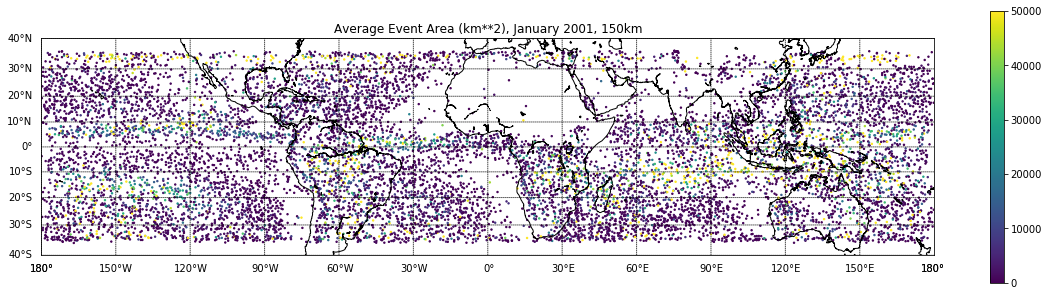

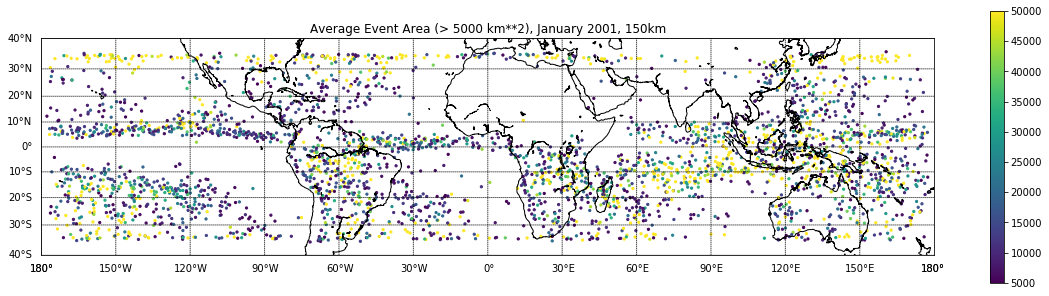

In [13]:
# Plot event areas
fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_area, s=2)
plt.clim(0, 50000)
plt.colorbar()
plt.title('Average Event Area (km**2), January 2001, 150km');
#fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
area_threshold = 5000
temp_x = event_lon[event_area > area_threshold]
temp_y = event_lat[event_area > area_threshold]
x, y = m(temp_x, temp_y)
m.scatter(x, y, c=event_area[event_area > area_threshold], s=5)
plt.clim(area_threshold, 50000)
plt.colorbar()
plt.title('Average Event Area (> 5000 km**2), January 2001, 150km');
#fig.savefig('plots/area_0701_150km.jpg', format='jpg', bbox_inches='tight');

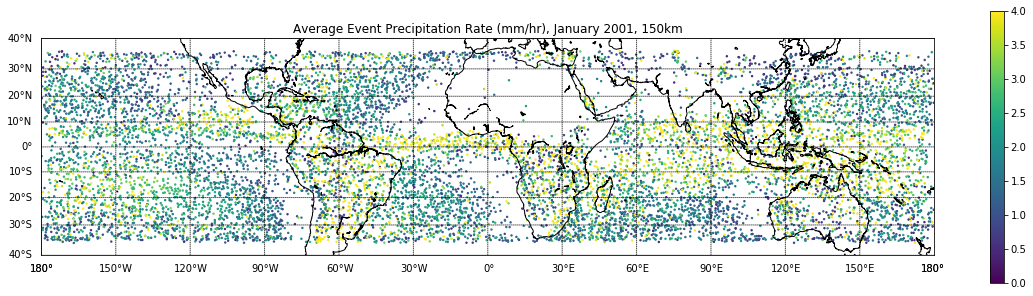

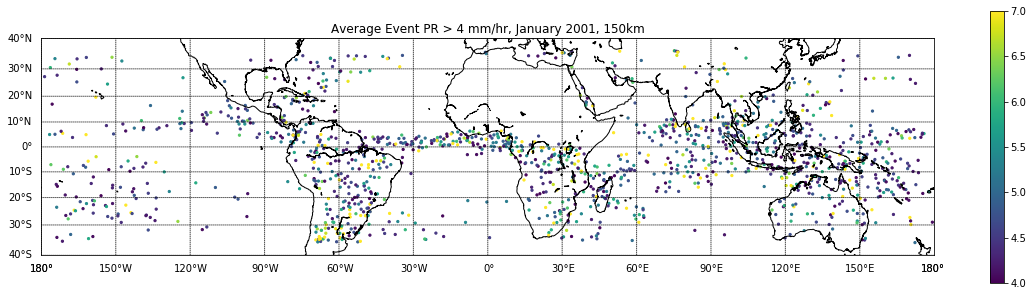

In [14]:
# Plot event precipitation
fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_pr, s=2)
plt.clim(0, 4)
plt.colorbar()
plt.title('Average Event Precipitation Rate (mm/hr), January 2001, 150km');
#fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
pr_threshold = 4
temp_x = event_lon[event_pr > pr_threshold]
temp_y = event_lat[event_pr > pr_threshold]
x, y = m(temp_x, temp_y)
m.scatter(x, y, c=event_pr[event_pr > pr_threshold], s=5)
plt.clim(pr_threshold, 7)
plt.colorbar()
plt.title('Average Event PR > 4 mm/hr, January 2001, 150km');
#fig.savefig('plots/pr_0701_150km.jpg', format='jpg', bbox_inches='tight');

#fig = plt.figure(num=None, figsize=(20, 5) )
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#m.drawcoastlines()
#m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
#x, y = m(event_lon, event_lat)
#m.scatter(x, y, c=event_pr*event_area, s=2)
#plt.clim(0, 300000)
#plt.colorbar()
#plt.title('Total Event Precipitation (mm/hr), One Month');
##fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

#fig = plt.figure(num=None, figsize=(20, 5) )
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#m.drawcoastlines()
#m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
#threshold = 50000
#data = event_pr*event_area
#temp_x = event_lon[data > threshold]
#temp_y = event_lat[data > threshold]
#x, y = m(temp_x, temp_y)
#m.scatter(x, y, c=data[data > threshold], s=5)
#plt.clim(threshold, 300000)
#plt.colorbar()
#plt.title('Total Event PR > A Threshold (mm/hr), One Month');
##fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

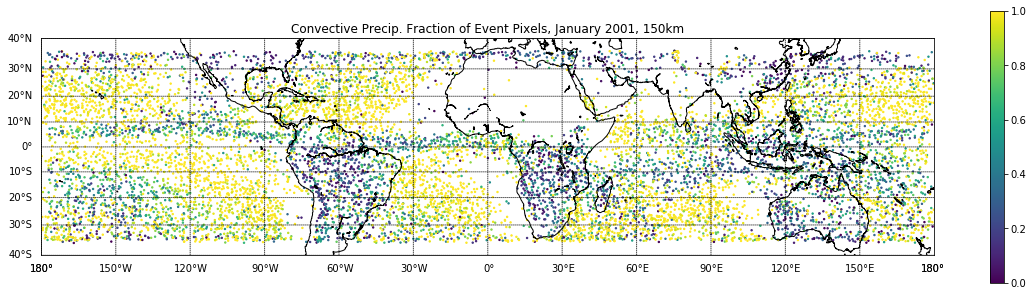

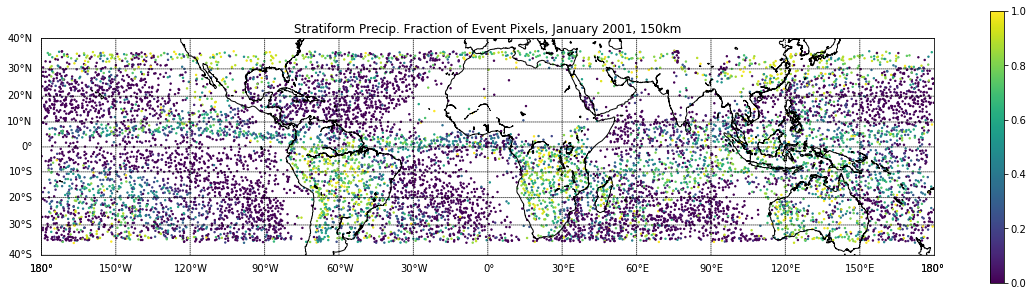

In [15]:
# Plot event precipitation type
fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_frac_conv, s=2)
plt.clim(0, 1)
plt.colorbar()
plt.title('Convective Precip. Fraction of Event Pixels, January 2001, 150km');
#fig.savefig('plots/convfrac_0701_150km.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_frac_strat, s=2)
plt.clim(0, 1)
plt.colorbar()
plt.title('Stratiform Precip. Fraction of Event Pixels, January 2001, 150km');
#fig.savefig('plots/stratfrac_0701_150km.jpg', format='jpg', bbox_inches='tight');

#fig = plt.figure(num=None, figsize=(20, 5) )
#m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
#            resolution='l',projection='merc')
#m.drawcoastlines()
#m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
#x, y = m(event_lon, event_lat)
#m.scatter(x, y, c=event_frac_other, s=2)
#plt.clim(0, 1)
#plt.colorbar()
#plt.title('Other Precip. Fraction of Event Pixels, January 2001');
##fig.savefig('oneday.jpg', format='jpg', bbox_inches='tight');

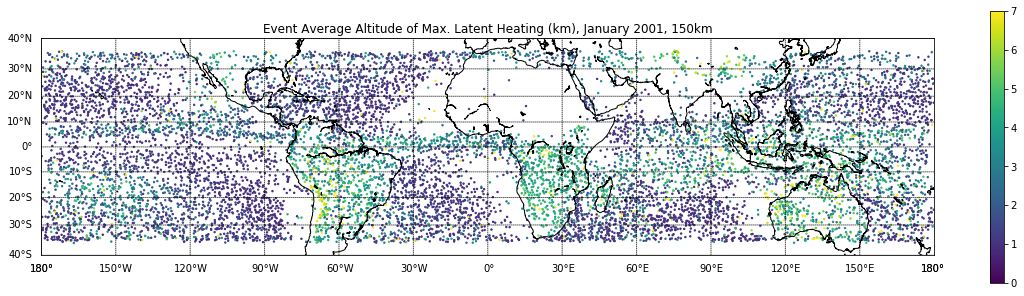

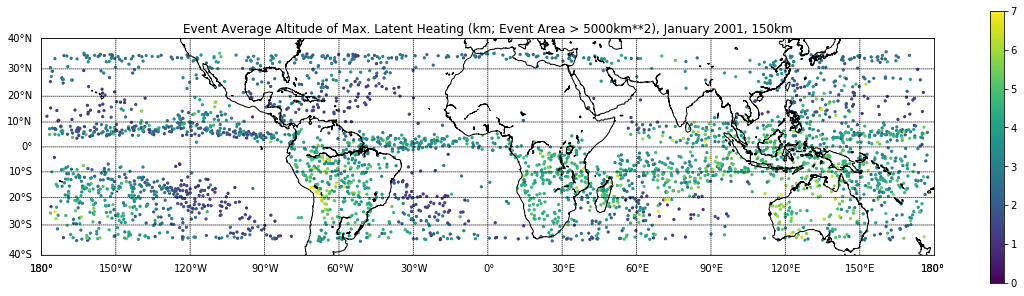

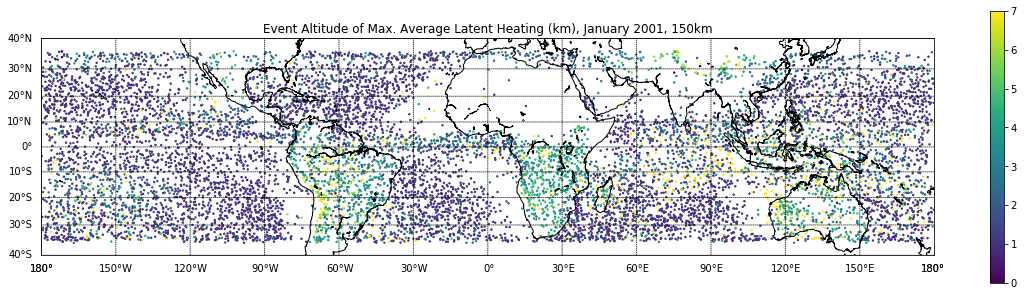

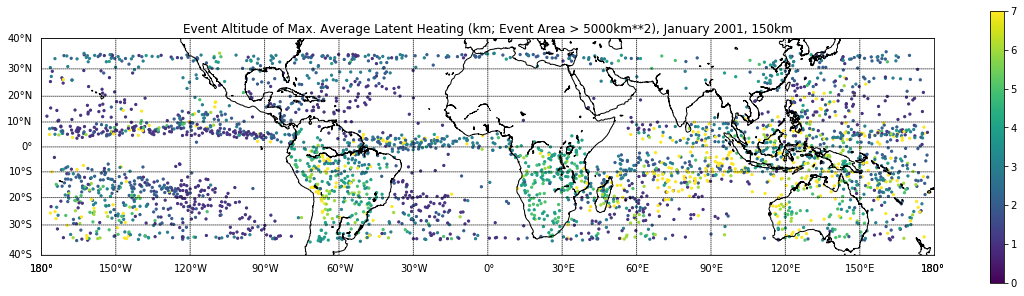

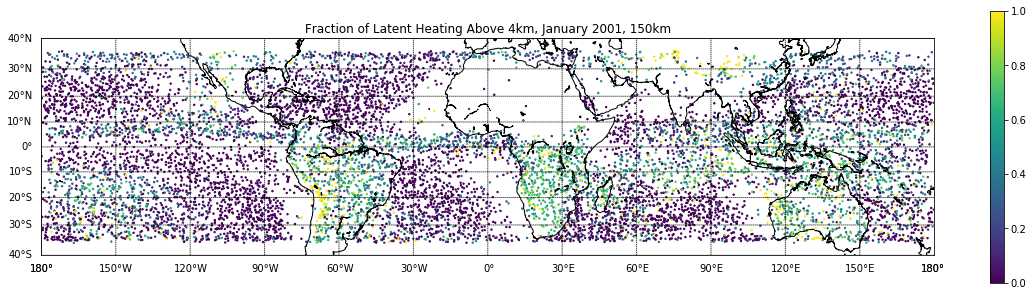

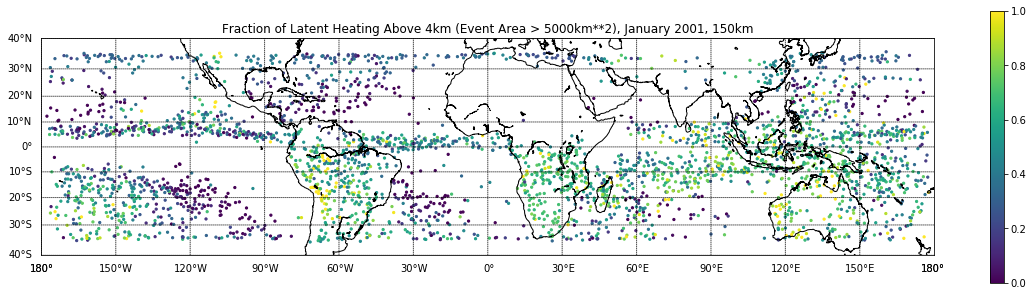

In [16]:
# Plot event altitude of peak latent heating

# Calculate the profile top-heaviness
splitting_level = 5 # 5: 4km
temp_lhp = 0.5*(event_lhp[:,1:] + event_lhp[:,:-1])
dz = altitude_lh[1:] - altitude_lh[:-1]
dz = np.tile(dz, (nevents,1))

lhp_tot = np.nansum(temp_lhp*dz, axis=1)
lhp_upper = np.nansum(temp_lhp[:,splitting_level:]*dz[:,splitting_level:], axis=1)
lhp_lower = np.nansum(temp_lhp[:,:splitting_level]*dz[:,:splitting_level], axis=1)
lhp_upper_frac = lhp_upper/lhp_tot
lhp_lower_frac = lhp_lower/lhp_tot

# Find the altitude of peak latent heating from the event mean lhp
sign = np.empty((nevents))
sign[::2] = 1
sign[1::2] = -1
sign = np.tile(sign, (19,1)).swapaxes(0,1)
dummy_vals = 1E-10*np.arange(19)
dummy_vals = np.tile(dummy_vals, (nevents,1))*sign
temp_lhp = event_lhp + dummy_vals
temp_alt = np.tile(altitude_lh, (nevents,1))
lhmax = np.nanmax(temp_lhp, axis=1)
#lhmax[lhmax == 0] = np.nan
temp = np.tile(lhmax, (19,1)).swapaxes(0,1)
temp = temp-temp_lhp
temp_alt = temp_alt[temp == 0]
event_lhpmax_alt2 = temp_alt

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_lhpmax_alt, s=2)
plt.clim(0, 7)
plt.colorbar()
plt.title('Event Average Altitude of Max. Latent Heating (km), January 2001, 150km');
#fig.savefig('plots/lhpmaxalt_0101_150km.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
area_threshold = 5000
temp_x = event_lon[event_area > area_threshold]
temp_y = event_lat[event_area > area_threshold]
x, y = m(temp_x, temp_y)
m.scatter(x, y, c=event_lhpmax_alt[event_area > area_threshold], s=5)
plt.clim(0, 7)
plt.colorbar()
plt.title('Event Average Altitude of Max. Latent Heating (km; Event Area > 5000km**2), January 2001, 150km');
#fig.savefig('plots/lhpmaxalt_0701_150km.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=event_lhpmax_alt2, s=2)
plt.clim(0, 7)
plt.colorbar()
plt.title('Event Altitude of Max. Average Latent Heating (km), January 2001, 150km');
#fig.savefig('plots/lhpmaxalt_0101_150km.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
temp_x = event_lon[event_area > area_threshold]
temp_y = event_lat[event_area > area_threshold]
x, y = m(temp_x, temp_y)
m.scatter(x, y, c=event_lhpmax_alt2[event_area > area_threshold], s=5)
plt.clim(0, 7)
plt.colorbar()
plt.title('Event Altitude of Max. Average Latent Heating (km; Event Area > 5000km**2), January 2001, 150km');
#fig.savefig('plots/lhpmaxalt2_0701_150km.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
x, y = m(event_lon, event_lat)
m.scatter(x, y, c=lhp_upper_frac, s=2)
plt.clim(0, 1)
plt.colorbar()
plt.title('Fraction of Latent Heating Above 4km, January 2001, 150km');
#fig.savefig('plots/convfrac_gridded_0101.jpg', format='jpg', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(20, 5) )
m = Basemap(llcrnrlon=-180.,llcrnrlat=-40,urcrnrlon=180.,urcrnrlat=40.,\
            resolution='l',projection='merc')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,10.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1])
temp_x = event_lon[event_area > area_threshold]
temp_y = event_lat[event_area > area_threshold]
x, y = m(temp_x, temp_y)
m.scatter(x, y, c=lhp_upper_frac[event_area > area_threshold], s=5)
plt.clim(0, 1)
plt.colorbar()
plt.title('Fraction of Latent Heating Above 4km (Event Area > 5000km**2), January 2001, 150km');
#fig.savefig('plots/lhp_upperfrac_0701_150km.jpg', format='jpg', bbox_inches='tight');

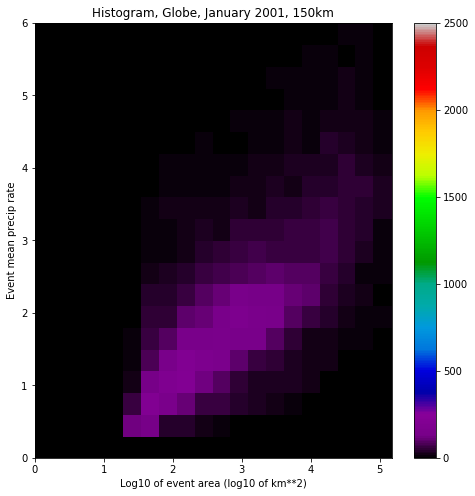

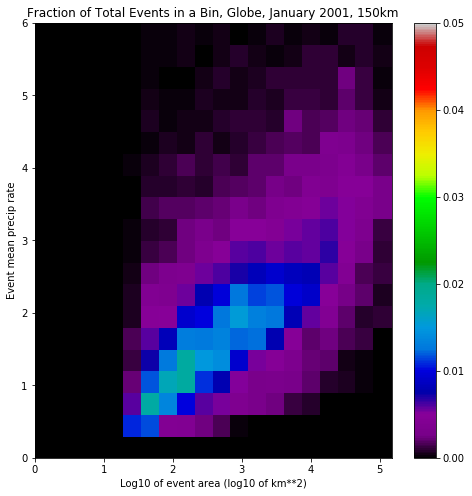

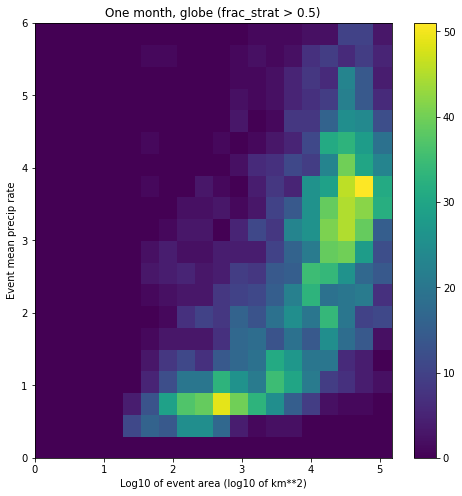

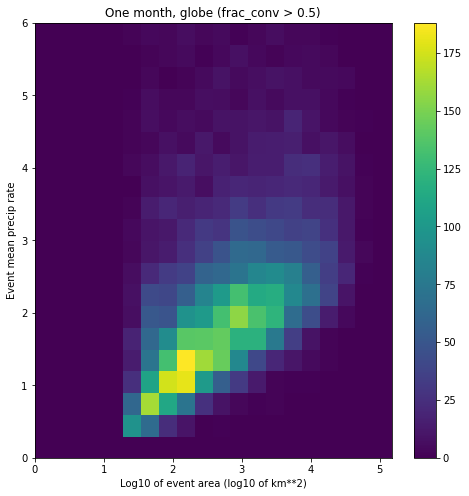

In [17]:
# Make some 2d histograms
nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5
nevents = np.size(event_area)

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log10(area_min) + np.log10(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log10(event_area), event_pr, bins=[bins_area,bins_pr], cmap='nipy_spectral')
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(pr_min, pr_max)
plt.clim(0, 2500)
plt.title('Histogram, Globe, January 2001, 150km')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();
#fig.savefig('plots/hist2d_0101_6km.eps', format='eps', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(8, 8) )
plt.pcolor(n[1], n[2], np.transpose(n[0]/nevents), cmap='nipy_spectral')
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(pr_min, pr_max)
plt.clim(0, 0.05)
plt.title('Fraction of Total Events in a Bin, Globe, January 2001, 150km')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();
#fig.savefig('plots/prob2d_0101_6km.eps', format='eps', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log10(event_area[event_frac_strat>0.5]), event_pr[event_frac_strat>0.5],
               bins=[bins_area,bins_pr])
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 2000)
plt.title('One month, globe (frac_strat > 0.5)')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log10(event_area[event_frac_conv>0.5]), event_pr[event_frac_conv>0.5],
               bins=[bins_area,bins_pr])
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 8000)
plt.title('One month, globe (frac_conv > 0.5)')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

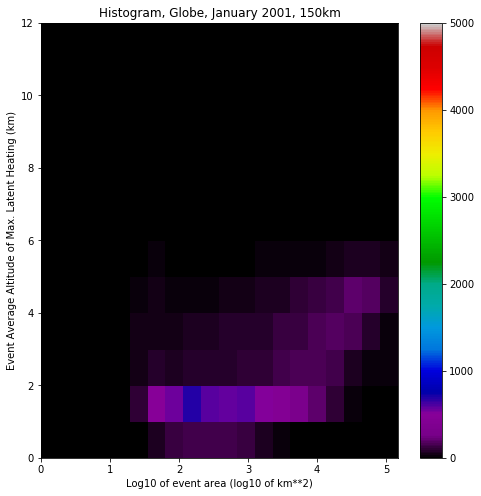

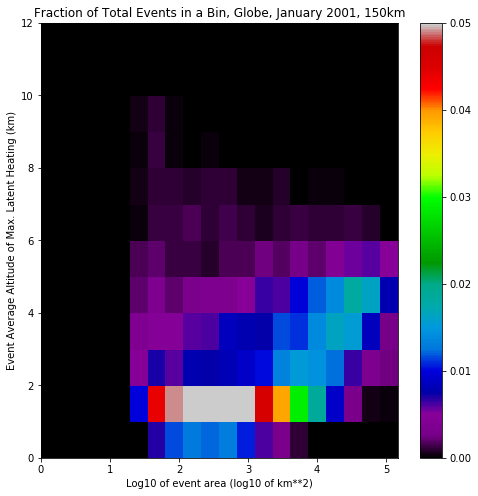

In [18]:
# Make some 2d histograms of latent heating profiles
nbins = 20
area_min = 1
area_max = 1.5E5
nevents = np.size(event_area)

factor = 1
bins_alt = np.arange(factor*18)/factor
bins_area = np.log10(area_min) + np.log10(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log10(event_area), event_lhpmax_alt, bins=[bins_area,bins_alt], cmap='nipy_spectral')
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(0, 12)
plt.clim(0, 5000)
plt.title('Histogram, Globe, January 2001, 150km')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event Average Altitude of Max. Latent Heating (km)')
plt.colorbar();
#fig.savefig('plots/hist2d_lhp_0101_6km.eps', format='eps', bbox_inches='tight');

fig = plt.figure(num=None, figsize=(8, 8) )
plt.pcolor(n[1], n[2], np.transpose(n[0]/nevents), cmap='nipy_spectral')
plt.xlim(np.log10(area_min), np.log10(area_max))
plt.ylim(0, 12)
plt.clim(0, 0.05)
plt.title('Fraction of Total Events in a Bin, Globe, January 2001, 150km')
plt.xlabel('Log10 of event area (log10 of km**2)')
plt.ylabel('Event Average Altitude of Max. Latent Heating (km)')
plt.colorbar();
#fig.savefig('plots/prob2d_lhp_0101_6km.eps', format='eps', bbox_inches='tight');

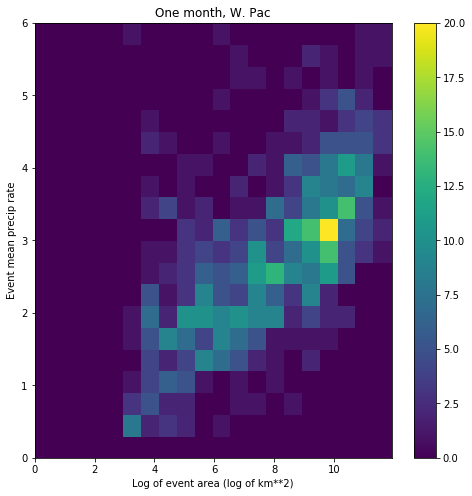

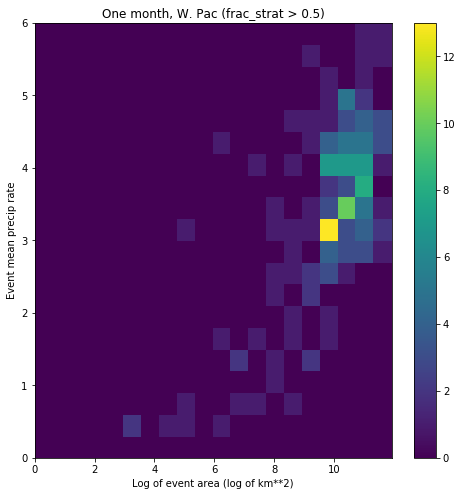

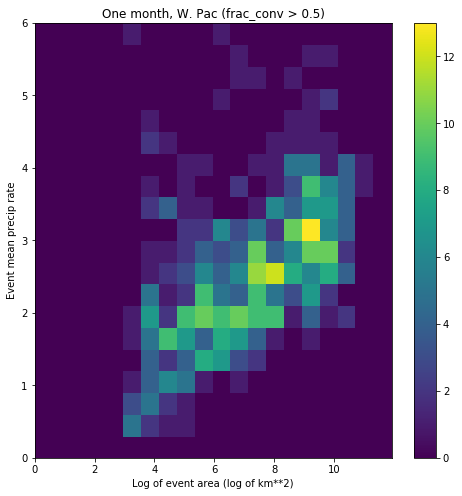

In [22]:
# Make some 2d histograms, W. Pac
lat_min = -20
lat_max = 10
lon_min = 150
lon_max = -150+360

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

temp_lon[temp_lon < 0] = temp_lon[temp_lon < 0] + 360

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

temp_lon[temp_lon > 180] = temp_lon[temp_lon > 180] - 360

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, W. Pac')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, W. Pac (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, W. Pac (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

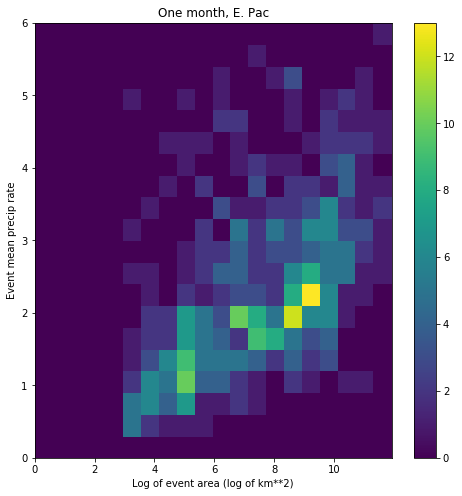

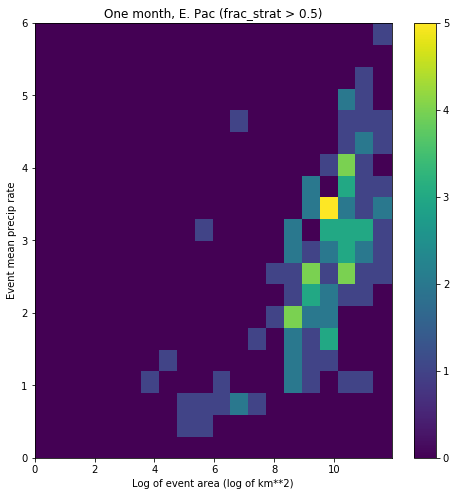

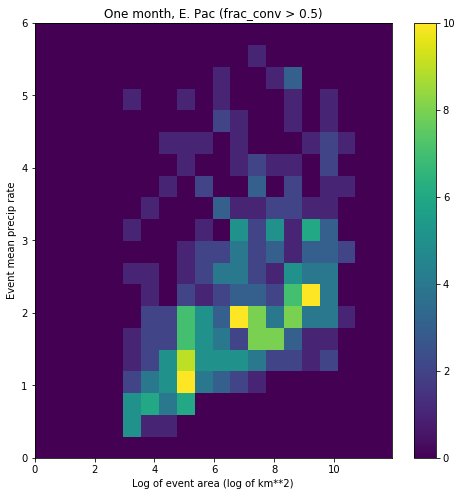

In [23]:
# Make some 2d histograms, E. Pac
lat_min = 0
lat_max = 20
lon_min = -150
lon_max = -90

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, E. Pac')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, E. Pac (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, E. Pac (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

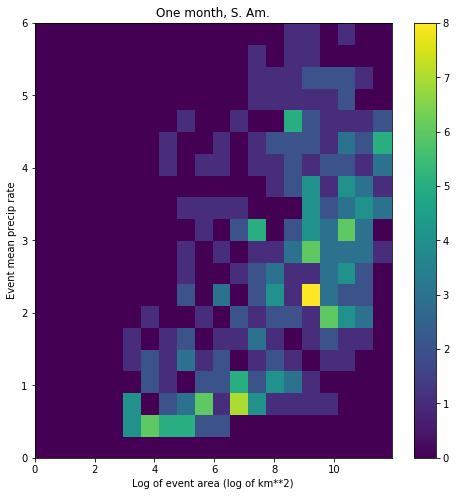

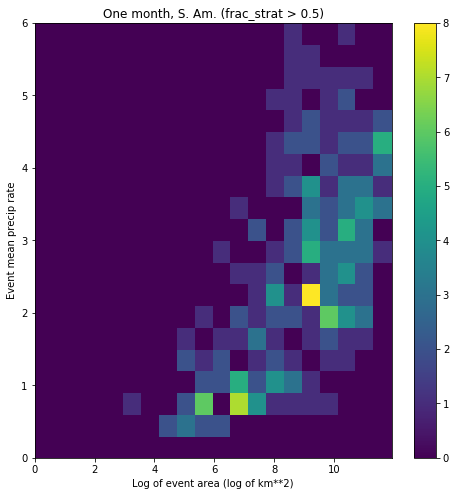

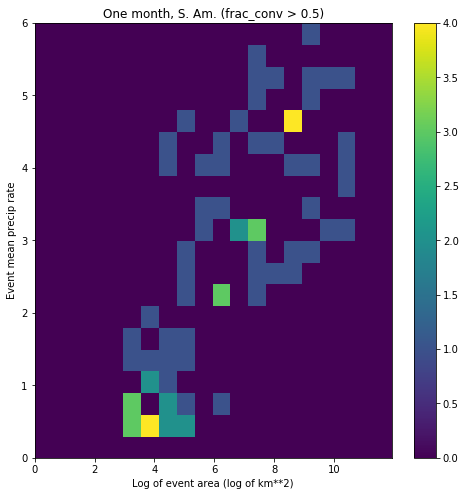

In [24]:
# Make some 2d histograms, S. Am.
lat_min = -20
lat_max = 0
lon_min = -75
lon_max = -45

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, S. Am.')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, S. Am. (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, S. Am. (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

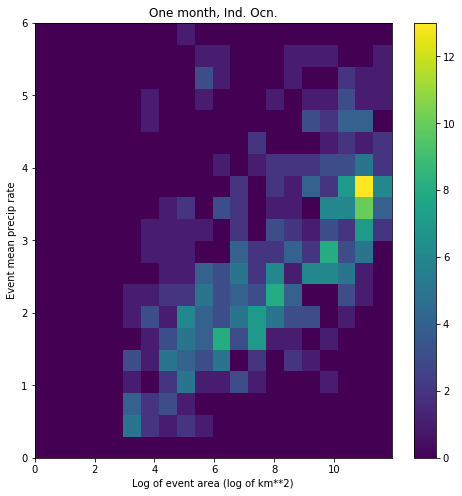

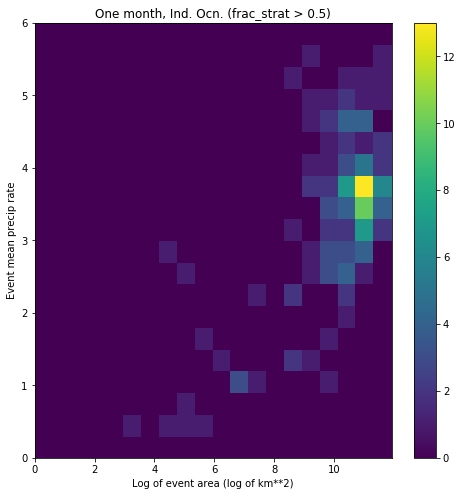

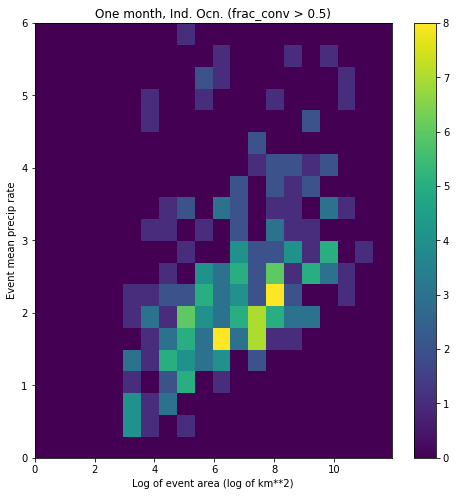

In [25]:
# Make some 2d histograms, Ind. Ocn.
lat_min = -20
lat_max = 0
lon_min = 50
lon_max = 100

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Ind. Ocn.')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Ind. Ocn. (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Ind. Ocn. (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

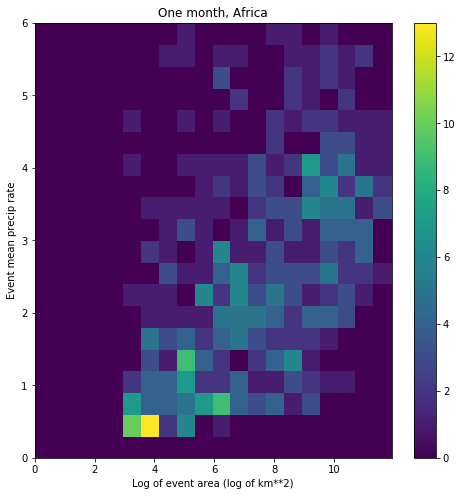

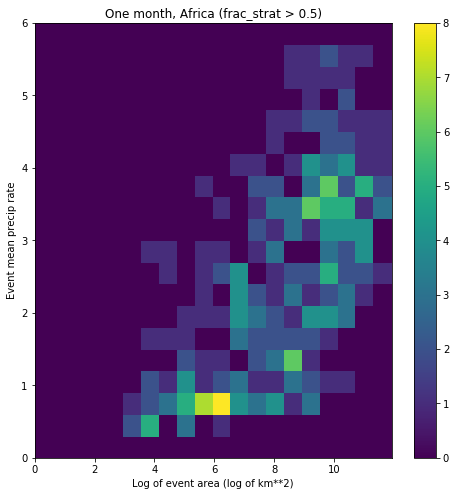

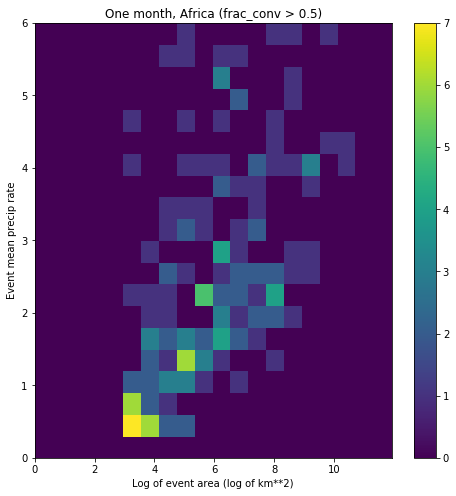

In [26]:
# Make some 2d histograms, Africa
lat_min = -30
lat_max = 0
lon_min = 10
lon_max = 40

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Africa')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Africa (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Africa (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

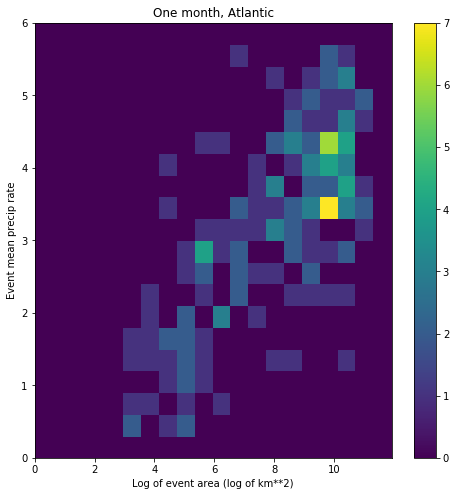

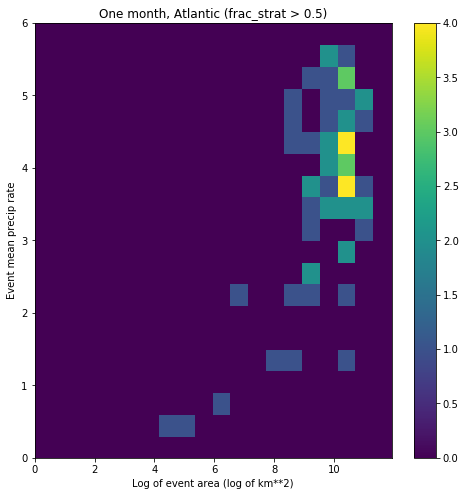

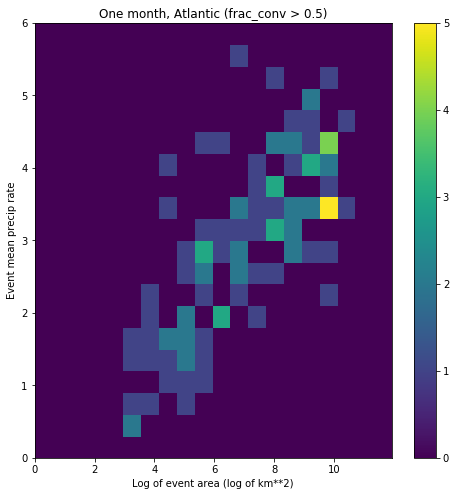

In [27]:
# Make some 2d histograms, Atlantic
lat_min = -3
lat_max = 7
lon_min = -45
lon_max = -10

nbins = 20
bincount_pr = 250
bincount_area = 1000
pr_min = 0
pr_max = 6
area_min = 1
area_max = 1.5E5

temp_lat = event_lat.copy()
temp_lon = event_lon.copy()
area = event_area.copy()
pr = event_pr.copy()
frac_strat = event_frac_strat.copy()
frac_conv = event_frac_conv.copy()

area = area[temp_lat > lat_min]
pr = pr[temp_lat > lat_min]
frac_strat = frac_strat[temp_lat > lat_min]
frac_conv = frac_conv[temp_lat > lat_min]
temp_lon = temp_lon[temp_lat > lat_min]
temp_lat = temp_lat[temp_lat > lat_min]
area = area[temp_lat < lat_max]
pr = pr[temp_lat < lat_max]
frac_strat = frac_strat[temp_lat < lat_max]
frac_conv = frac_conv[temp_lat < lat_max]
temp_lon = temp_lon[temp_lat < lat_max]
temp_lat = temp_lat[temp_lat < lat_max]
area = area[temp_lon < lon_max]
pr = pr[temp_lon < lon_max]
frac_strat = frac_strat[temp_lon < lon_max]
frac_conv = frac_conv[temp_lon < lon_max]
temp_lat = temp_lat[temp_lon < lon_max]
temp_lon = temp_lon[temp_lon < lon_max]
area = area[temp_lon > lon_min]
pr = pr[temp_lon > lon_min]
frac_strat = frac_strat[temp_lon > lon_min]
frac_conv = frac_conv[temp_lon > lon_min]
temp_lat = temp_lat[temp_lon > lon_min]
temp_lon = temp_lon[temp_lon > lon_min]

bins_pr = pr_min + (pr_max - pr_min)*np.arange(nbins+1)/nbins
bins_area = np.log(area_min) + np.log(area_max - area_min)*np.arange(nbins+1)/nbins
bins_frac = np.arange(nbins+1)/nbins

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area), pr, bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Atlantic')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_strat>0.5]), pr[frac_strat>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Atlantic (frac_strat > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();

fig = plt.figure(num=None, figsize=(8, 8) )
n = plt.hist2d(np.log(area[frac_conv>0.5]), pr[frac_conv>0.5], bins=[bins_area,bins_pr])
plt.xlim(np.log(area_min), np.log(area_max))
plt.ylim(pr_min, pr_max)
#plt.clim(0, 50)
plt.title('One month, Atlantic (frac_conv > 0.5)')
plt.xlabel('Log of event area (log of km**2)')
plt.ylabel('Event mean precip rate')
plt.colorbar();